In [3]:
import pandas as pd

In [4]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [6]:
diabetes = pd.read_csv('diabetes.csv')

In [7]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X = diabetes.drop(columns = ['Outcome'])
y = diabetes['Outcome']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

In [10]:
print(len(X_train),' ',len(y_train))

614   614


In [11]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [12]:
xgb = XGBClassifier(
    n_estimators=300,        # number of boosting rounds
    learning_rate=0.05,      # step size shrinkage
    max_depth=4,             # tree depth
    subsample=0.8,           # subsample ratio for training
    colsample_bytree=0.8,    # subsample ratio for features
    gamma=0,                 # min loss reduction
    reg_lambda=1,            # L2 regularization
    scale_pos_weight=1,      # for imbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

In [13]:
# Train model
xgb.fit(X_train, y_train)

C:\Users\mathe\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [00:24:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [14]:
y_pred = xgb.predict(X_test)

In [15]:
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

In [16]:
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 Precision:", precision_score(y_test, y_pred))
print("🔹 Recall (Sensitivity):", recall_score(y_test, y_pred))
print("🔹 F1 Score:", f1_score(y_test, y_pred))
print("🔹 ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

🔹 Accuracy: 0.7402597402597403
🔹 Precision: 0.6296296296296297
🔹 Recall (Sensitivity): 0.6296296296296297
🔹 F1 Score: 0.6296296296296297
🔹 ROC-AUC: 0.822962962962963

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       100
           1       0.63      0.63      0.63        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



# using parameter efficient grid search - RandomizedSearchCV

In [18]:
import seaborn as sns

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import pickle

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [21]:
diabetes = pd.read_csv('diabetes.csv')

In [41]:
diabetes['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [45]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [51]:
X = diabetes.drop(columns = ['Outcome'])
y = diabetes['Outcome']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

In [55]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [57]:
# 2. Fit and save the scaler
scaler = StandardScaler()

In [65]:
diabetes_feature_order = X_train.columns.to_list()

In [85]:
X_train_scaled = scaler.fit_transform(X_train)
pickle.dump(scaler, open('diabetes_scaler.pkl', 'wb'))


In [21]:
from xgboost import XGBClassifier

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# hyper paramters
xgb = XGBClassifier(
    eval_metric="logloss",
    random_state=42
)


In [69]:
# Wider parameter distribution
param_dist = {
    "n_estimators": np.arange(100, 600, 100),        # 100–500
    "max_depth": np.arange(3, 10, 1),                # 3–9
    "learning_rate": np.linspace(0.01, 0.3, 10),     # 0.01–0.3
    "subsample": np.linspace(0.6, 1.0, 5),           # 0.6–1.0
    "colsample_bytree": np.linspace(0.6, 1.0, 5),    # 0.6–1.0
    "gamma": np.linspace(0, 0.4, 5),                 # 0–0.4
    "reg_lambda": np.arange(1, 6, 1)                 # L2 regularization
}


In [31]:
# RandomizedSearchCV (optimize recall)
rand_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,          # number of random combinations to try
    scoring="recall",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [71]:
rand_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                        'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                                        'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 200, 300, 400, 500]),
                                        'reg_lambda': array([1, 2, 3, 4, 5]),
                                        'subsample': array([0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, scoring='recall', verbose=2)

In [73]:
# Best parameters
print("✅ Best Parameters:", rand_search.best_params_)
print("✅ Best Recall Score (CV):", rand_search.best_score_)

✅ Best Parameters: {'subsample': 0.7, 'reg_lambda': 4, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.07444444444444444, 'gamma': 0.4, 'colsample_bytree': 0.9}
✅ Best Recall Score (CV): 0.621594684385382


In [75]:
# 4. Evaluate best model on test data
# -------------------
best_model = rand_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [77]:
print("\nTest Set Performance:")
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 Precision:", precision_score(y_test, y_pred))
print("🔹 Recall (Sensitivity):", recall_score(y_test, y_pred))
print("🔹 F1 Score:", f1_score(y_test, y_pred))
print("🔹 ROC-AUC:", roc_auc_score(y_test, y_pred_proba))


Test Set Performance:
🔹 Accuracy: 0.7402597402597403
🔹 Precision: 0.6296296296296297
🔹 Recall (Sensitivity): 0.6296296296296297
🔹 F1 Score: 0.6296296296296297
🔹 ROC-AUC: 0.8255555555555556


In [79]:
pickle.dump(best_model, open('diabetes_model.pkl', 'wb'))


In [81]:
# Also save the feature order
pickle.dump(diabetes_feature_order, open('diabetes_feature_order.pkl', 'wb'))

print("Model and scaler have been saved!")

Model and scaler have been saved!


In [83]:
diabetes_feature_order

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [57]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       100
           1       0.63      0.63      0.63        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



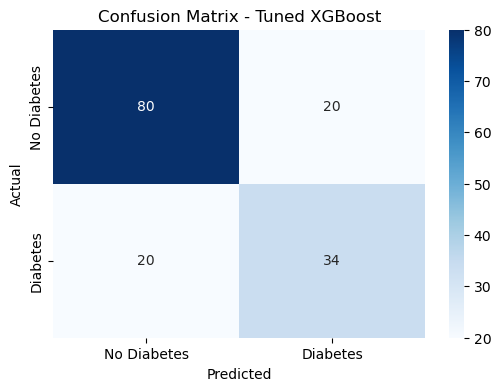

In [65]:
# -------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes","Diabetes"],
            yticklabels=["No Diabetes","Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()


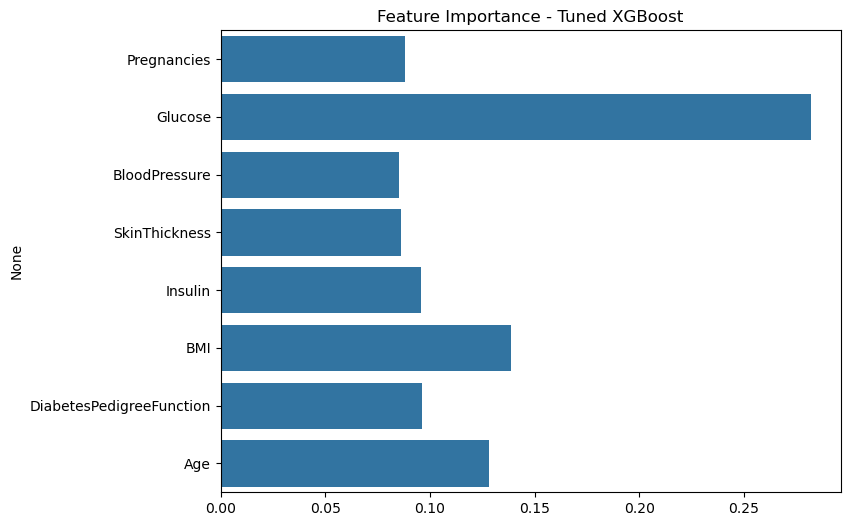

In [67]:
plt.figure(figsize=(8,6))
sns.barplot(x=best_model.feature_importances_, y=X.columns)
plt.title("Feature Importance - Tuned XGBoost")
plt.show()


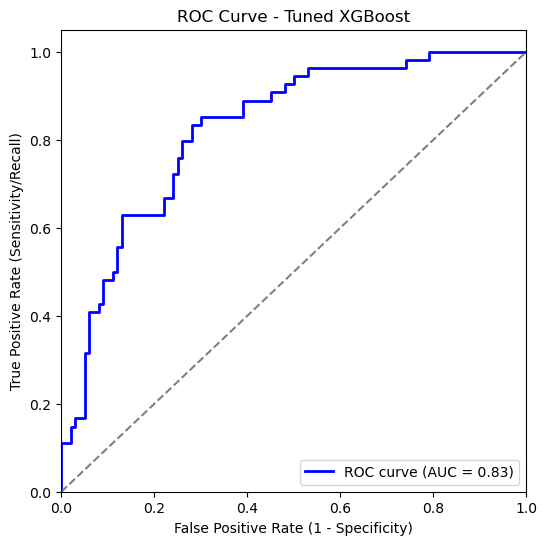

In [69]:
from sklearn.metrics import roc_curve, auc

# -------------------
# 7. ROC Curve
# -------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--")  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity/Recall)")
plt.title("ROC Curve - Tuned XGBoost")
plt.legend(loc="lower right")
plt.show()


In [75]:
best_params = {
    'subsample': 0.7,
    'reg_lambda': 4,
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.07444444444444444,
    'gamma': 0.4,
    'colsample_bytree': 0.9
}

final_model = XGBClassifier(
    eval_metric="logloss",
    random_state=42,
    **best_params
)

# Train final model
final_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.4,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07444444444444444,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [77]:
def predict_diabetes(user_input):
    """
    user_input: dict with keys ['Pregnancies','Glucose','BloodPressure','SkinThickness',
                                'Insulin','BMI','DiabetesPedigreeFunction','Age']
    """
    # Convert to DataFrame
    input_df = pd.DataFrame([user_input])

    # Predict
    prediction = final_model.predict(input_df)[0]
    probability = final_model.predict_proba(input_df)[0][1]  # probability of diabetes

    result = "Diabetes" if prediction == 1 else "No Diabetes"
    return result, round(probability*100, 2)


In [79]:
# Example input
user_data = {
    "Pregnancies": 2,
    "Glucose": 150,
    "BloodPressure": 85,
    "SkinThickness": 32,
    "Insulin": 120,
    "BMI": 33.6,
    "DiabetesPedigreeFunction": 0.627,
    "Age": 45
}

result, prob = predict_diabetes(user_data)
print(f"Prediction: {result}")
print(f"Risk Probability: {prob}%")


Prediction: Diabetes
Risk Probability: 74.15%
